# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [1]:
# Show what's in the directory we are in
!ls 

dataset_examination.ipynb  segs.h5  SynthText.h5


In [1]:
import h5py
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Open dataset and see, what's inside

In [15]:
db_path = 'SynthText.h5'
db = h5py.File(db_path,'r')

In [16]:
print(list(db['data'].items()))

[]


## Add segmentation images to your own dataset

In [17]:
import numpy as np
def add_segs_to_db(db_path='segs.h5', segs=None, imgname='image'):
    """
    Add segmentated images and their names
    to the dataset.
    """
    db = h5py.File(db_path,'w')
    db.create_group("ucms")
    names = list()
    ninstance = len(segs)

    for i in range(ninstance):
        dname = "%s_%d"%(imgname, i)

        db['ucms'].create_dataset(dname, data=segs[i])
        names.append(dname)

    # add names

    names_ascii = [n.encode("ascii", "ignore") for n in names]
    db.create_dataset('names', (len(names_ascii),1),'S10', names_ascii)
    db.close()

In [18]:
# Function for tests (this is used in original code)
def get_imname(ucm_h5, i):
            return "".join(map(chr, ucm_h5['names'][0,i][:]))

In [19]:
# Load segmentation image we want to store to the .h5 dataset
seg_image = cv2.imread('/home/gayduchenko/data/curved_paper_segmentation.jpg')

In [20]:
# Add the image to the dataset
segs = list()
segs.append(seg_image)
add_segs_to_db(segs=segs)

TypeError: One of data, shape or dtype must be specified

In [9]:
# See what we have got
!ls

dataset_examination.ipynb  segs.h5  SynthText.h5


Датасет создан! Теперь проверим, всё ли нормально создалось.

In [92]:
# Load dataset made by PyTorch-HED with segmentation images
dset = h5py.File('../../pytorch-hed/out.png.h5', 'r')
print(list(dset['names'][0, 0]))

[105, 109, 97, 103, 101, 95, 48]


In [93]:
# Test function on the first image of the dataset
get_imname(dset, 0)

'image_0'

Works pretty fine

In [2]:
# Print dataset as a tree
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))

In [95]:
dset.visititems(print_attrs)

names
ucms
ucms/image_0


## Check the segmentation image

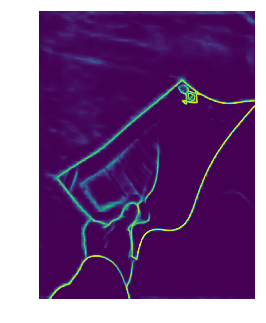

In [96]:
# Check the segmentation image
pixels = dset['ucms'][dset['names'][0, 0]][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [54]:
!ls

dataset_examination.ipynb  out_segmented.png  segs.h5  SynthText.h5


## Check labeled dataset curved_paper_labeled.h5

We have passed the dataset `curved_paper_segmented.jpg.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `curved_paper_labeled.h5` as output. Let's see, what we have got at the end:

In [3]:
!ls ~/data

curved_paper.jpg	    curved_paper_labels.jpg
curved_paper.jpg_depth.npy  curved_paper_segmented.jpg
curved_paper.jpg_depth.png  curved_paper_segmented.jpg.h5
curved_paper_labels.h5


In [34]:
labels_file = h5py.File('/home/gayduchenko/data/curved_paper_labels.h5', 'r')
labels_file.visititems(print_attrs)
labels_file['mask/image_0'][:][400:500, 400:500]

mask
mask/image_0
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


array([[ 0,  0,  0, ..., 39, 39, 39],
       [ 0,  0,  0, ..., 39, 39, 39],
       [ 0,  0,  0, ..., 39, 39, 39],
       ...,
       [67, 67, 67, ..., 39, 39, 39],
       [67, 67, 67, ..., 39, 39, 39],
       [67, 67, 67, ..., 39, 39, 39]], dtype=uint16)

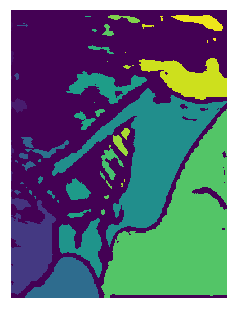

In [14]:
# Check the segmentation image
pixels = labels_file['mask/image_0'][:]
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
im = ax.imshow(pixels)

# SAVE and show the image
import os.path as osp
home = osp.expanduser("~")
fig.savefig(osp.join(home, 'data/curved_paper_labels.jpg'), bbox_inches='tight', pad_inches=0)
plt.show()

In [23]:
!ls ../data

dset.h5  fonts	models	newsgroup


In [76]:
original_dset = h5py.File('../data/dset.h5', 'r')
original_dset.visititems(print_attrs)

depth
depth/hiking_125.jpg
depth/indian+musicians_116.jpg
depth/sandwich_96.jpg
depth/sea_15.jpg
depth/village_43.jpg
image
image/hiking_125.jpg
image/indian+musicians_116.jpg
image/sandwich_96.jpg
image/sea_15.jpg
image/village_43.jpg
seg
seg/hiking_125.jpg
    area: [ 5281 20355    39 12237  2207    21    99  2775   673  2271   389   329
    33 21743    45    83    27     9     9   185  7217    63    21  2593
   497    27  1525     9 28131   127  1807   273    57    57   979    17
   259    59   535    15    55   245    89   921   259   401   485   617
  5011   219  2631   629  1323   279   291  2169    39   207  1291   501
   109   155    63   589   457    93  1127   931   199   191   273   477
  3011  4533  1165   119  1313  1365   927   435   175    77   203  6363
    51    45  1211   131    61   443   603    15   323    81  2059    63
  8239   681    51    63    15    83    15   557    27   147   213    83
   137  3465    75   193  1053    27    71    87   285   883   855   427
 

In [118]:
# Collect everything into one single dataset
out_dset = h5py.File('/home/gayduchenko/data/curved_paper.h5', 'w')
out_dset.create_group('depth')
out_dset.create_group('image')
out_dset.create_group('seg')

<HDF5 group "/seg" (0 members)>

In [119]:
# load data from prepared datasets to join them together
depth = np.squeeze(np.load('/home/gayduchenko/data/curved_paper.jpg_depth.npy'))
image = np.asarray(Image.open('/home/gayduchenko/data/curved_paper.jpg'))
segs = h5py.File('/home/gayduchenko/data/curved_paper_labels.h5', 'r')

In [131]:
print(np.isinf(depth).any())
print(np.isnan(depth).any())

False
False


In [121]:
out_dset['depth'].create_dataset('curved_paper.jpg', data=depth)
out_dset['image'].create_dataset('curved_paper.jpg', data=image)
out_dset['seg'].create_dataset('curved_paper.jpg', data=segs['mask/image_0'][:])

<HDF5 dataset "curved_paper.jpg": shape (1022, 766), type "<u2">

In [122]:
for key in segs['mask/image_0'].attrs.keys():
    out_dset['seg/curved_paper.jpg'].attrs[key] = segs['mask/image_0'].attrs[key].copy()

In [123]:
out_dset.visititems(print_attrs)

depth
depth/curved_paper.jpg
image
image/curved_paper.jpg
seg
seg/curved_paper.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


In [124]:
out_dset.close()

# SynthText resulting dataset examination

In [24]:
synth_dset = h5py.File('curved_paper.h5', 'r')

In [25]:
synth_dset.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[ 93.71273929  93.8628502   93.40620065 218.64356753 232.62971605
   236.51747072 241.16298333 247.82972859 252.18198599 259.60468171
   271.17383607 271.05826588 282.8507121  277.99308278 296.89634628
   293.68891163 239.55423577 250.44960298 259.67693525 262.67624734
   275.32851959 284.59858193 290.31115928  26.910612    35.67891803
    44.63482367  23.68712205  33.84111826  42.7227763  207.08472765
   210.66505648 213.20003732 221.42040856 225.01032246 227.56533161
   232.91659247 241.09303571 249.48556937 253.09428521 259.59607672
   228.17395549 231.14213896 238.49985677 255.45636868 261.30574939
   271.28625   ]
  [ 93.23607247  93.47817886  92.92213998 229.63585007 238.84270911
   242.71847287 244.60399737 255.44587412 256.3199366  267.93194251
   276.0575934  274.52455966 286.35869721 288.41204972 300.41346798
   297.17902696 248.03087056 258.96657874 267.49704574 271.17400162
   283.88493458 291.02565655 293.88459108  35.45009676  46

In [26]:
def show_and_save_image(dset, imname, path):
    pixels = dset[imname][:]
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    im = ax.imshow(pixels)

    # SAVE and show the image
    import os.path as osp
    fig.savefig(osp.join(path), bbox_inches='tight', pad_inches=0)
    plt.show()  
    return im

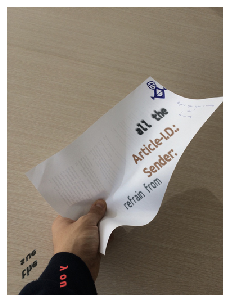

In [27]:
show_and_save_image(synth_dset, 'data/curved_paper.jpg_0', 'curved_paper_synth.png')

In [28]:
synth_dset.close()

In [29]:
!open .